In [2]:
import config
import numpy as np
import quandl as ql
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
# sort out api key
ql.ApiConfig.api_key = config.api_key
# get data for yield curve
yield_ = ql.get("USTREASURY/YIELD")

yield_ = yield_.dropna()

In [4]:
yield_.shape

(1306, 12)

In [5]:
yield_.tail()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2023-12-29,5.60,5.59,5.40,5.26,4.79,4.23,4.01,3.84,3.88,3.88,4.20,4.03
2024-01-02,5.55,5.54,5.46,5.24,4.80,4.33,4.09,3.93,3.95,3.95,4.25,4.08
2024-01-03,5.54,5.54,5.48,5.25,4.81,4.33,4.07,3.90,3.92,3.91,4.21,4.05
2024-01-04,5.56,5.48,5.48,5.25,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13
2024-01-05,5.54,5.48,5.47,5.24,4.84,4.40,4.17,4.02,4.04,4.05,4.37,4.21


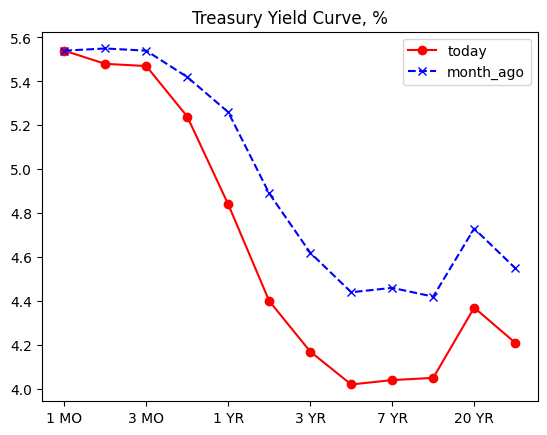

In [6]:
# Plot yield curve
today = yield_.iloc[-1,:]
month_ago = yield_.iloc[-30,:]
df = pd.concat([today, month_ago], axis=1)
df.columns = ['today', 'month_ago']

df.plot(style={'today': 'ro-', 'month_ago': 'bx--'}
        ,title='Treasury Yield Curve, %');

In [28]:
scaled_data = preprocessing.scale(yield_.T)

In [29]:
pca = PCA()

In [30]:
pca.fit(scaled_data)

PCA()

In [31]:
pca_data = pca.transform(scaled_data)

In [32]:
per_var = np.round(pca.explained_variance_ratio_ * 100, 2)
labels = ["PC" + str(x) for x in range(1, len(per_var) + 1)]

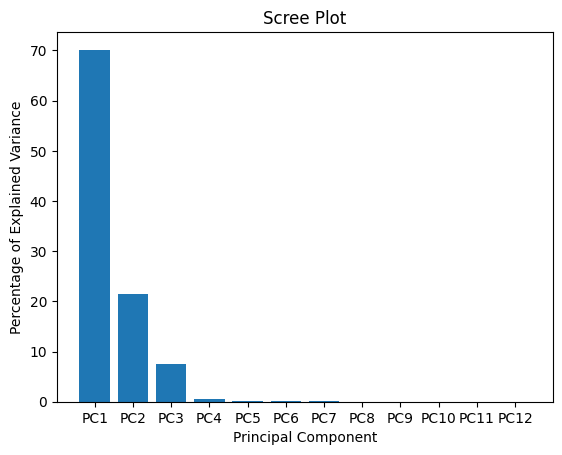

In [33]:
plt.bar(x = range(1, len(per_var) + 1), height = per_var, tick_label = labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

In [27]:
pca_df = pd.DataFrame(pca_data, index = ["1MO", "2MO", "3MO", "6MO", "1Y", "2Y", "3Y", "5Y", "7Y", "10Y", "20Y", "30Y"], columns = labels)

ValueError: Shape of passed values is (1306, 12), indices imply (12, 12)

In [20]:
pca_data

array([[-3.24021524e+01,  1.81676812e+01,  1.77194812e+01,
         3.28618978e+00,  3.06441205e+00,  5.32113998e-01,
         7.23593816e-01,  1.38208927e-01, -4.91448136e-02,
         9.66950191e-03, -7.99593576e-03,  1.04916076e-14],
       [-3.18335212e+01,  1.58344830e+01,  6.62147087e+00,
        -1.35661044e+00, -1.74780453e+00, -1.07015797e+00,
        -1.86403001e+00, -1.27551159e+00, -2.76956885e-02,
         1.05205356e-01,  2.72271522e-02,  1.40998324e-14],
       [-3.12564424e+01,  1.32558325e+01, -2.24714118e-01,
        -2.99003643e+00, -1.74126254e+00, -1.01441726e+00,
         2.42891510e-01,  1.75017321e+00, -8.68273061e-02,
        -9.30291253e-02, -2.43477321e-02,  1.83186799e-15],
       [-2.67474461e+01,  7.18949225e+00, -1.42019189e+01,
        -1.68059633e+00, -2.55209477e-01,  6.97283820e-01,
         2.15084801e+00, -9.11601204e-01,  6.08974403e-01,
         1.08732871e-02,  6.27423784e-04, -4.08006962e-15],
       [-2.12177868e+01, -3.29932587e+00, -1.6431924